<a href="https://colab.research.google.com/github/Nando-Tezoh/CNN_Assignment/blob/master/dog_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import packages

In [1]:
#https://drive.google.com/file/d/1qXKSt6jAgh20f-2PkRT-Z61PW-3E4S_z/

# Load helper file
link = "https://drive.google.com/file/d/1qXKSt6jAgh20f-2PkRT-Z61PW-3E4S_z/"

_, id_t = link.split('d/')

id = id_t.split('/')[0]

print ("Loading file ...")

print (id) # Verify that you have everything after '='

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = id
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])
print ("Completed")

Loading file ...
1qXKSt6jAgh20f-2PkRT-Z61PW-3E4S_z
Completed


In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/train/
   creating: data/train/cat/
  inflating: data/train/cat/11.jpeg  
  inflating: data/train/cat/25.jpeg  
  inflating: data/train/cat/5.jpeg   
  inflating: data/train/cat/16.jpeg  
  inflating: data/train/cat/17.jpeg  
  inflating: data/train/cat/10.jpg   
  inflating: data/train/cat/9.jpg    
  inflating: data/train/cat/6.jpeg   
  inflating: data/train/cat/7.jpeg   
  inflating: data/train/cat/12.jpeg  
  inflating: data/train/cat/8.jpeg   
  inflating: data/train/cat/13.jpeg  
  inflating: data/train/cat/14.jpeg  
  inflating: data/train/cat/18.jpeg  
  inflating: data/train/cat/15.jpeg  
  inflating: data/train/cat/19.jpeg  
  inflating: data/train/cat/20.jpeg  
  inflating: data/train/cat/21.jpeg  
  inflating: data/train/cat/22.jpeg  
  inflating: data/train/cat/23.jpeg  
  inflating: data/train/cat/24.jpeg  
  inflating: data/train/cat/27.jpeg  
  inflating: data/train/cat/26.jpeg  
  inflating: data/train/cat/28.jpe

In [26]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import torch.optim as optim

from PIL import Image

from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F

import torch  
import torch.nn as nn 
import torchvision 

import glob
import os

from torchvision import datasets, transforms, models
%matplotlib inline

image_size = (100, 100)
image_row_size = image_size[0] * image_size[1]

In [0]:
### Dataset.py

In [0]:
class CatDogDataset(Dataset):
    def __init__(self, path, transform=None):
        ## To create Classes
        self.classes   = os.listdir(path)
        ### Create path for each Class
        self.path      = [f"{path}/{className}" for className in self.classes]
        ### To copy the images (upload)
        self.file_list = [glob.glob(f"{x}/*") for x in self.path]
        
        ### applied some transformations on the image

        self.transform = transform
        ### append the corresponding
        files = []
        for i, className in enumerate(self.classes):
            for fileName in self.file_list[i]:
                files.append([i, className, fileName])
                
        ### Assign the files to file_list
        self.file_list = files
        ###delete files
        files = None
        
    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        fileName = self.file_list[idx][2]
        classCategory = self.file_list[idx][0]
        im = Image.open(fileName)
        if self.transform:
            im = self.transform(im)
        return im, classCategory#im.view(-1), classCategory

In [0]:
### Build its transforms

In [0]:
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]
transform = transforms.Compose([
                                 transforms.Resize(image_size),
                                 transforms.Grayscale(),
                                transforms.ToTensor(), 
                                transforms.Lambda(lambda x: x.repeat(3,1,1)),
                                transforms.Normalize(mean, std)])

In [11]:
!pwd


/content


In [0]:
### train dataset

In [0]:
#path = '/home/aims/Documents/Tutors/Nando_assignment/Cat_Dog_data/train'
path = '/content/data/train'
dataset = CatDogDataset(path, transform=transform)

In [0]:
#### Test dataset

In [0]:
path1 = '/content/data/val'
dataset1 = CatDogDataset(path1, transform=transform)

In [0]:
### Check the Size of the dataset

In [19]:
### Train
l1= dataset.__len__()

print('the len of the train data is \n {}'.format(l1))

the len of the train data is 
 60


In [20]:
### Test
l2= dataset1.__len__()

print('the len of the train data is \n {}'.format(l2))

the len of the train data is 
 24


In [0]:
### Some images

In [0]:
def imshow(source):
    plt.figure(figsize=(10,10))
    imt = (source.view(-1, image_size[0], image_size[0]))
    imt = imt.numpy().transpose([1,2,0])
    imt = (std * imt + mean).clip(0,256)
    plt.subplot(1,2,2)
    plt.imshow(imt)

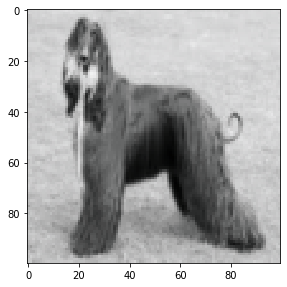

In [24]:
### imshow in=mages
imshow(dataset[0][0])

In [0]:
### For the train data
shuffle     = True
batch_size  = 8
num_workers = 1
dataloader  = DataLoader(dataset=dataset, 
                         shuffle=shuffle, 
                         batch_size=batch_size, 
                         num_workers=num_workers)

In [0]:
### For the train data
shuffle     = True
batch_size  = 8
num_workers = 1
dataloader1  = DataLoader(dataset=dataset1, 
                         shuffle=shuffle, 
                         batch_size=batch_size, 
                         num_workers=num_workers)

In [0]:
### Let us look at the size of the dataset

In [29]:
i=0
for i, (X,Y) in enumerate(dataloader):
    print(X.size())
    print(Y.size())
    print(i)
    #print(X.view(-1,3*100*100).size())
    break

torch.Size([8, 3, 100, 100])
torch.Size([8])
0


In [0]:
### Here, we have a RGB images

In [0]:
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=n_feature, kernel_size=(5,5))
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=(5,5))
        self.fc1 = nn.Linear(22*22*n_feature, 150)
        self.fc2 = nn.Linear(150, 2)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=(2,2))
        
        #print('maxpool\n',x.size())
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=(2,2))
        #print('shape after second maxpool',x.size())
        ### flatten() step
        ### 64*5*5*3
        x = x.view(-1, 22*22*self.n_feature)#(64,22*22*3)
        #x = x.view(75, -1)
        #print('after flatten',x.size())
        x = self.fc1(x)
        #print('fc1', x.shape)
        x = F.relu(x)
        x = self.fc2(x)
        #print('FC2',x.shape)
        x = F.log_softmax(x, dim=1)
        #print('ouput shape\n',x.size())
        return x

In [0]:
input_size  = 100*100   # images are 28x28 pixels
output_size = 2
n_feature =3

In [0]:
model = CNN(input_size,n_feature,output_size )

In [33]:
model

CNN(
  (conv1): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1452, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=2, bias=True)
)

In [0]:
n_features = 3 # number of feature maps


In [0]:
#### Change of names
train_loader = dataloader
test_loader = dataloader1

In [0]:
 #function to count number of parameters
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

In [37]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model)))

Number of parameters: 218708


In [0]:
### Train and Test code

In [0]:
accuracy_list = []

def train(epoch, model, perm=torch.arange(0, 100*100*3).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # permute pixels
        #print(target.shape)
        #print('data\n', data.shape)


        #data = data.view(-1, 100*100*1)
        #data = data[:, perm]
        data = data.view(-1, 3, 100, 100)
        
        optimizer.zero_grad()
        output = model(data)
        #print(output.size())
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model, perm=torch.arange(0, 100*100*3).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # permute pixels
        #data = data.view(-1, 100*100*3)
        #data = data[:, perm]
        data = data.view(-1, 3, 100, 100)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [40]:
for epoch in range(0, 1):
    train(epoch, model)
    test(model)

Train Epoch: 0 [0/60 (0%)]	Loss: 0.688307

Test set: Average loss: 0.6914, Accuracy: 12/24 (50%)



In [0]:
n_feature